# Cu LMM XPS Analysis

In [2]:
# Libraries
import numpy as np
import pandas as pd
import os
from scipy.interpolate import interp1d
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
# Function to interpolate
def interpolate(x, y):
    f = interp1d(x, y, kind='cubic', fill_value="extrapolate")
    xnew = np.arange(565, 580, 0.25)
    return xnew, f(xnew)

def normalize(y):
    return ((y) - min(y))/(max(y)-min(y))

In [5]:
df = pd.DataFrame()
drctry = './CuOx/Cu_LMM/'
files = os.listdir(drctry)
for file in files:
    if 'Cu' in file:
        data = pd.read_table(os.path.join(drctry, file))
        data = data[::-1]
        data = data.drop_duplicates(subset='x', keep="last")
        x = np.asarray(data.x)
        y = np.asarray(data.y)
        xnew, fnew = interpolate(x, y)
        df['xnew'] = xnew
        df[file] = normalize(fnew)
        

KeyError: Index(['x'], dtype='object')

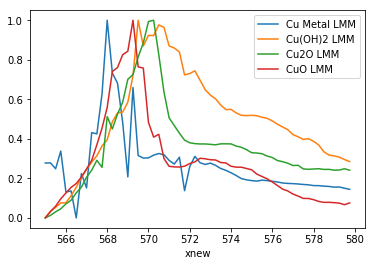

In [139]:
df.plot(x="xnew")

In [6]:
files

['.DS_Store',
 '.ipynb_checkpoints',
 'Cu Metal LMM',
 'Cu(OH)2 LMM',
 'Cu2O LMM',
 'CuO LMM',
 'CuOx LMM.csv']